# How Much is Your Home Worth? 

# Zillow Knows, Now the World Can Too. 

## About the Project: 

### Project Goals:

My goal is to produce a better model so that Zillow can more accuracatley predict the property assessed values of single family homes that had a transaction in 2017. 

### Project Description: 

New/better model needed. Zillow already has a model to predict the property assessed values of single family homes, however, they aren't fully satisfied with the result and are looking for a more accurate model. I will be looking at drivers of home value such as squarefootage, and number of rooms and bathrooms to most accurately prdict the tax value. I will be focusing on single family homes in three Soutnern California counties that had a transaction in 2017. My recommendations will be the features that prodecuded the best model and my goal is to create a model that out preform's Zillow's current one. 

### Initial Questions: 


- Why would a house cost more than another with the same physical features? 

- Do home values vary drastically by county? 

- Does certain attributes have more value than other i.e. does more rooms directly impact value? 
    - does more bathrroms directly impact value? 
    - do rooms add more value than bathrooms? 

- Does squarefootage impact home value? 


### Data Dictionary

A list of the variables in the dataframe and their meaning. 

| Variable       | Description                         |
| -------------- | ----------------------------------- |
| num_beds       | The number of bedrooms a house has  | 
| num_baths      | The number of bathrooms a house has |
| square_footage | The square feet of the house        |
| tax_value      | The tax value of the house          |
| year_built     | The year the house was built        |
| county_code    | The county the house is in          |

# Let's Get Started...

## Imports Needed

In [1]:
# Standard Libraries: 
import pandas as pd
import numpy as np 

# Visuals:
import matplotlib.pyplot as plt
import seaborn as sns

# Stats:
from scipy import stats

# Splitting
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import TweedieRegressor
import sklearn.preprocessing

# My Files
from env import host, user, password
import wrangle
import explore
import model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Acquiring and Wrangle

Use wrangle.py to both acquire the Zillow data from the SQL database, and then prepare the data for exploration and modeling. 

In [2]:
# Use the function wrangle_zillow from zillow.py to acuire data and split

train, validate, test = wrangle.wrangle_zillow()

In [3]:
# confirm reading in the correct data
train.head()

,num_beds,num_baths,square_footage,tax_value,year_built,county_code
29516,4.0,2.5,1470.0,311578.0,1978.0,6059.0
41702,4.0,2.0,1208.0,306475.0,1956.0,6059.0
4232,3.0,3.0,2063.0,124214.0,1956.0,6037.0
12495,2.0,1.0,1984.0,71410.0,1913.0,6037.0
38584,3.0,2.0,1430.0,203928.0,1950.0,6037.0


In [4]:
# Run split_tvt_into_variables / the target is tax_value
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_tvt_into_variables(train, validate, test, target='tax_value')

In [5]:
# Confirm results of slpit
# X_train.head()

In [6]:
# Confirm results of slpit
# y_train.head()

In [7]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Min_Max_Scaler(X_train, X_validate, X_test)

In [8]:
# Confirm the results of scale
# X_train_scaled.head()

## Exploration

Before the model can be created I need to explore the zillow data to find the variables that correlate to increased home values. 

To see what features drive home value I created a correlation matrix. If you look at the tax_value row on the left yout can read accross the columns to see that square footage, the number of bathrooms, and the number of bedrooms all correlate to tax value in that order. Square footage having the highest correlation and number of bedrooms having the least. You can also see from this matrix that all of the variables are correlated, meaning that more square footage also means more bathrooms, and the more bedrooms there are the more bathrooms and more square feet. 

Looking under the square_footage column we can see that is has a higher correlation to bathrooms than bedrooms. 

Takeaway: The bigger the house, the higher the value. The higher the value the more bathrooms and bedrooms it has, although there will be more bathrroms than bedrooms. 

In [9]:
# Correlation Matrix
corr_df = pd.concat([X_train_scaled, y_train], axis=1)
corrs = corr_df.corr()
corrs

,num_beds,num_baths,square_footage,tax_value
num_beds,1.000000,0.579184,0.607678,0.194477
num_baths,0.579184,1.000000,0.774739,0.359318
square_footage,0.607678,0.774739,1.000000,0.431936
tax_value,0.194477,0.359318,0.431936,1.000000


### Let's visualize the takeaways: 

<Figure size 432x288 with 0 Axes>

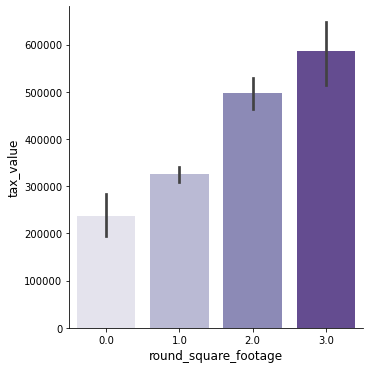

In [10]:
# sns bar plot of from explore.py
new_train = explore.square_footage_rounded(train)
explore.plot_categorical_and_continuous_vars3('round_square_footage', 'tax_value', new_train.sample(1_000))

In [11]:
r, p = stats.pearsonr(X_train_scaled['square_footage'], y_train)
print(f'The p-value is: {p}. There is {round(p,5)}% chance that we see these results by chance.')
print(f'r = {round(r, 2)}')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.43


<Figure size 432x288 with 0 Axes>

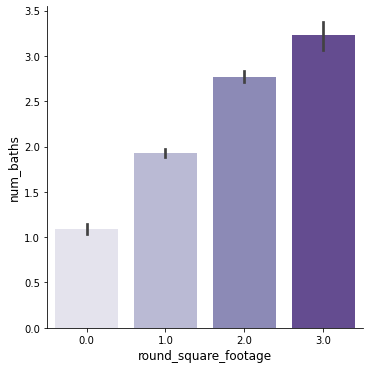

In [12]:
explore.plot_categorical_and_continuous_vars3('round_square_footage', 'num_baths', new_train.sample(1_000))


In [13]:
r, p = stats.pearsonr(X_train_scaled['num_baths'], y_train)
print(f'The p-value is: {p}. There is {round(p,2)}% chance that we see these results by chance.')
print(f'r = {round(r, 2)}')

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.36


<Figure size 432x288 with 0 Axes>

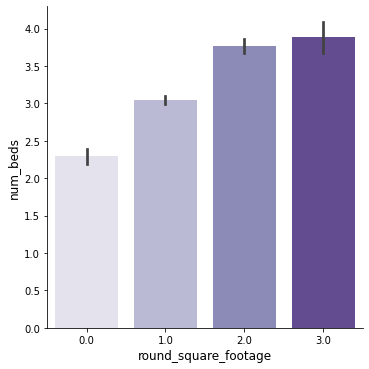

In [14]:
explore.plot_categorical_and_continuous_vars3('round_square_footage', 'num_beds', new_train.sample(1_000))


In [15]:
r, p = stats.pearsonr(X_train_scaled['num_beds'], y_train)
print(f'The p-value is: {p}. There is {round(p,2)}% chance that we see these results by chance.')
print(f'r = {round(r, 2)}')

The p-value is: 2.0785015490055953e-210. There is 0.0% chance that we see these results by chance.
r = 0.19


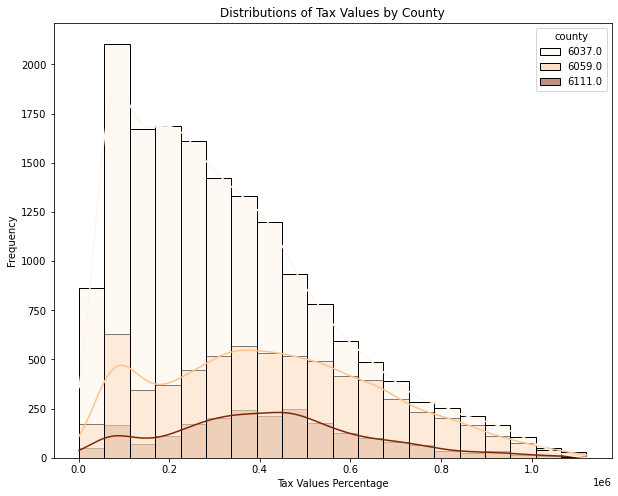

In [16]:
tax_by_county = pd.DataFrame({'county':train.county_code,'tax value':train.tax_value})
explore.value_by_county()

## Modeling

In [17]:
model.baseline(y_train, y_validate)

,model,RMSE_train,RMSE_validate
0,mean_baseline,236152.362296,236027.699082


In [18]:
model.OLS(X_train_scaled, X_validate_scaled, y_train, y_validate)

,model,RMSE_train,RMSE_validate
0,OLS Regressor,209508.010298,208907.129593


In [19]:
model.Lasso_Lars(X_train_scaled, X_validate_scaled, y_train, y_validate)

,model,RMSE_train,RMSE_validate
0,lasso_alpha0.01,209508.010332,208907.107119


In [20]:
model.Linear_Regression(X_train_scaled, X_validate_scaled, y_train, y_validate)

,model,RMSE_train,RMSE_validate
0,linear_regression,209401.660425,208925.819834


In [23]:
# model.Lasso_Lars_Viz(X_train_scaled, X_validate_scaled, y_train, y_validate)

RMSE for Lasso + Lars
Training/In-Sample:  209508.0103322495 
Test/Out-of-Sample:  209762.25323824695 
Difference:  254.24290599743836


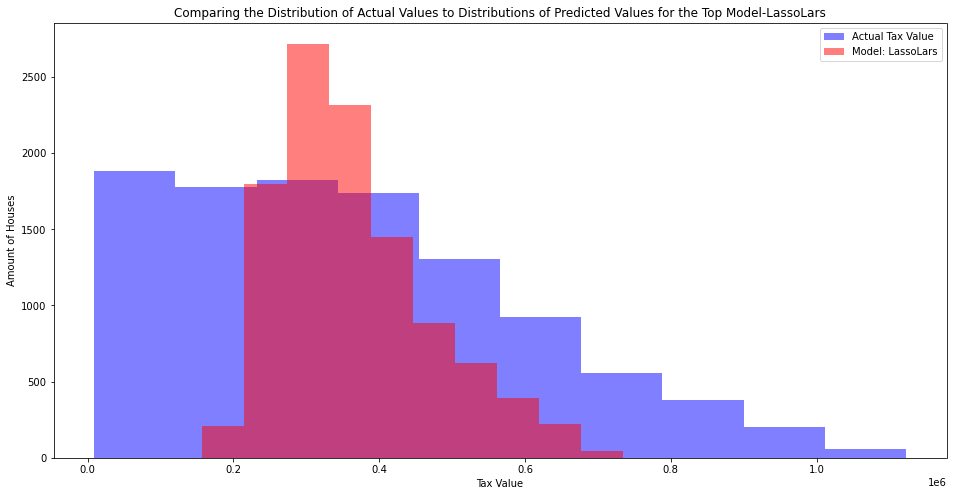

In [22]:
model.Lasso_Lars_Test(X_train_scaled, X_validate_scaled, y_train, y_validate, X_test_scaled, y_test)